# Using Training and Validation Sets

In this notebook you will use training and validation sets to identify which model best fits the data. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy import polyfit
import pathlib as pl
import os
import pandas as pd
np.random.seed(1) # set the random seed for reproducibility 


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
def polynomial(x, coeffs):
    """calculates y values of polynomial at inputs x
    :param x: the input values the polynomial is to be evaluated at
    :param coeffs: the coefficients of the polynomial. The polynomial is of order len(coeffs)-1 """
    poly = np.poly1d(coeffs)
    return poly(x)

In [6]:
path_csv = pl.Path(os.getcwd()) / f'M5_data.csv'
with open(path_csv, 'rb') as file:
    data_pd = pd.read_csv(file)

data = {'X':data_pd['x'].to_numpy(), 'Y':data_pd['y'].to_numpy()}

## Part 1: Model Selection

### Task 1.1: Split the data

The first thing we do is split the data into the relevant sets using the split_data function. To begin with, split the data into 40% training, 30% validation and 30% test. 

In [7]:
def split_data(data_dict, data_split):
    """divide the data into training, validate and test sets. 
    :param data_dict: a dictionary of the data with keys 'X' and 'Y'
    :param data_split: a list of the fraction of the data to be in each set of form 
    [training_fraction, validation_fraction, test_fraction]. The fractions should all add up to 1.
    :returns training_dict, validation_dict, test_dict: dictionaries of the same form as the data_dict, 
    containing the different sets"""
    
    assert np.sum(data_split)-1 < 0.01
    
    # work out how many datapoints will be in the train and validation sets 
    n_train = int(len((data_dict['X']))*data_split[0])
    n_validate = int(len((data_dict['X']))*data_split[1])
    
    # generate a random permutation of indices of the data and split into training, validation and test
    perm = np.random.permutation(range(len(data_dict['X'])))
    indices_train, indices_validate, indices_test = np.split(perm, [n_train, n_train+ n_validate])
    
    # create training, validation and test dictionaries 
    training_dict = {'X': data['X'][indices_train], 'Y': data['Y'][indices_train]}
    validation_dict = {'X': data['X'][indices_validate], 'Y': data['Y'][indices_validate]}
    test_dict = {'X': data['X'][indices_test], 'Y': data['Y'][indices_test]}
    
    return training_dict, validation_dict, test_dict

In [8]:
# split the data into training, validation and test sets

### TO DO ###
training_data, validation_data, test_data = split_data(data, [0.4,0.3,0.3])
#################

print(test_data.keys()) 

dict_keys(['X', 'Y'])


### Task 1.2: Fit Models

Use the numpy polyfit function to fit polynomials of orders 1 to 6 to the training set. Make a dictionary containing the coefficients of the polynomials with the order of the polynomial as the key. So the coefficients dictionary should look like { 1: array, 2:array} and so on. 

In [9]:
orders = list(range(1, 7))
coefficients = {}

#######################
#TO DO: make dictionary containing coefficients of polynomials fitted to the training data as described above. 
for i in orders:
    fit = np.polyfit(training_data['X'], training_data['Y'], deg=i)
    coefficients[i] = fit
    
######################
coefficients

{1: array([14.11609316, -4.80808955]),
 2: array([-0.37192714, 14.01249865, -4.28002641]),
 3: array([ 9.16462542, -3.82289221, -7.70272561,  5.22255605]),
 4: array([-1.99565716,  8.80573279,  3.18815833, -6.62173948,  1.4242975 ]),
 5: array([ 0.47789281, -2.03383701,  6.59808657,  3.55605157, -4.44502375,
         0.66297161]),
 6: array([-0.96655161,  1.01408763,  2.73443595,  3.79488677, -1.68726083,
        -0.99879374,  0.57873077])}

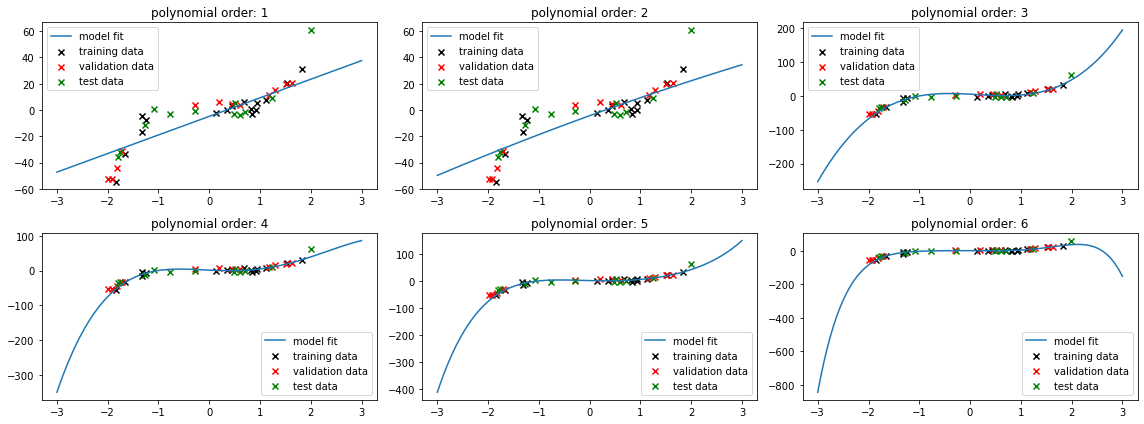

In [10]:
#### Plot each of the fitted models along with the training and validation data 

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))
ax = axs.flatten()

x_plot = np.linspace(-3, 3, 100)

for i, coeffs in enumerate(coefficients.values()):
    ax[i].plot(x_plot, polynomial(x_plot, coeffs), label='model fit')
    ax[i].scatter(training_data['X'], training_data['Y'], marker='x', color='k', label='training data')
    ax[i].scatter(validation_data['X'], validation_data['Y'], marker='x', color='r', label='validation data')
    ax[i].scatter(test_data['X'], test_data['Y'], marker='x', color='g', label='test data')
    ax[i].set_title(f'polynomial order: {list(coefficients.keys())[i]}')
    ax[i].legend()
plt.tight_layout()
plt.legend()



### Task 1.3: Calculate the RMSE for Training and Validation Sets


Calculate the root mean squared error for both the training and validation sets. Plot this on a graph, and use this to decide which model is the best fit. Fill out the first question in the corrosponding questionaire. 

In [11]:
training_RMSEs = []
validation_RMSEs = []

#######################
### TO DO ###
for k,v in coefficients.items():
    train_predict = np.polyval(v,training_data['X'])
    train_absError = train_predict - training_data['Y']
    t_SE = np.square(train_absError) # squared errors
    t_MSE = np.mean(t_SE) # mean squared errors
    t_RMSE = np.sqrt(t_MSE) # Root Mean Squared Error, RMSE
    training_RMSEs.append(t_RMSE)
    validation_predict = np.polyval(v,validation_data['X'])
    validation_absError = validation_predict - validation_data['Y']
    v_SE = np.square(validation_absError) # squared errors
    v_MSE = np.mean(v_SE) # mean squared errors
    v_RMSE = np.sqrt(v_MSE) # Root Mean Squared Error, RMSE
    validation_RMSEs.append(v_RMSE)

print(training_RMSEs)
print(validation_RMSEs)
#######################

best = np.argmin(validation_RMSEs)
print(best)
print('best model:', orders[best])

[9.837790329567145, 9.83044307338174, 3.8302982191688555, 3.248468941533551, 3.2356593291323783, 3.1656165325779777]
[10.2098728004786, 9.856641689475785, 6.162694895293075, 8.049405933902204, 8.562339405745307, 10.62551909719268]
2
best model: 3


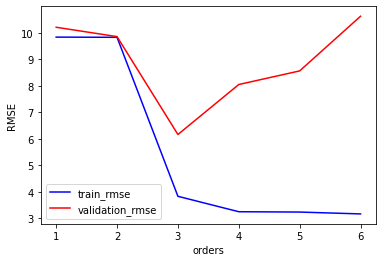

In [12]:
### TO DO ####
#Plot the training and validation RMSEs of the models
plt.clf()
plt.plot(orders, training_RMSEs, color='blue', label='train_rmse')
plt.plot(orders, validation_RMSEs, color='red', label='validation_rmse')
plt.xlabel('orders')
plt.ylabel('RMSE')
plt.legend()

## Part 2: Model Performance

### Task 2.1 Use the test set to evaluate model performance 

Calculate the RMSE of the model predictions compared to the test data 

In [13]:
### TO DO: use the test dataset to calculate the RMSE of the best model on the test data

####################
test_predict = np.polyval(coefficients[best + 1],test_data['X'])
test_absError = test_predict - test_data['Y']
test_SE = np.square(test_absError) # squared errors
test_MSE = np.mean(test_SE) # mean squared errors
test_RMSE = np.sqrt(test_MSE) # Root Mean Squared Error, RMSE

test_RMSE

7.160440202186666